# Preparar los datos para los diversos modelos (proceso empírico)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
#pd.set_option('display.max_rows', None)   # mostrar todas las filas del df
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
salaries = pd.read_csv('../data/salaries_data.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [3]:
test = pd.read_csv('../data/testeo.csv')
test.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [4]:
#concateno los dos df
df_ori = pd.concat([salaries, test], axis=0)
df_ori.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    int64  
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       500 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 277.0 KB


In [5]:
df = df_ori.copy()

In [6]:
df.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [7]:
df.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [8]:
#demasiados trabajos, habrá que resumir.
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [9]:
#Voy a borrar esta columna
df.salary_currency.value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
TRY      3
PLN      3
HUF      2
CNY      2
SGD      2
DKK      2
BRL      2
AUD      2
MXN      2
CHF      1
CLP      1
Name: salary_currency, dtype: int64

In [10]:
# demasiados países también. se necesita reducir
salaries.company_location.value_counts()

US    296
GB     41
CA     25
DE     23
IN     19
FR     12
ES     12
GR     10
JP      4
NL      4
PT      4
LU      3
AE      3
AT      3
PL      3
PK      3
TR      3
CH      2
AU      2
BR      2
NG      2
SI      2
BE      2
MT      1
IR      1
DZ      1
HU      1
CZ      1
HN      1
RO      1
CL      1
EE      1
UA      1
NZ      1
DK      1
CN      1
KE      1
VN      1
MX      1
IE      1
AS      1
MD      1
SG      1
Name: company_location, dtype: int64

In [11]:
df.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [12]:
# función para generar mapa de calor de correlación
def corr_heatmap(df):
    plt.rcParams['figure.figsize']=(20, 10)
    
    corr=df.corr(method='pearson')
    
    sns.set(style='white')    # estilo blanco

    mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara

    cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


    sns.heatmap(corr,
                mask=mascara,
                cmap=cmap,
                vmax=1,
                vmin=-1,
                center=0,
                square=True,
                linewidth=0.5,
                cbar_kws={'shrink': 0.5},
                annot=True
               );

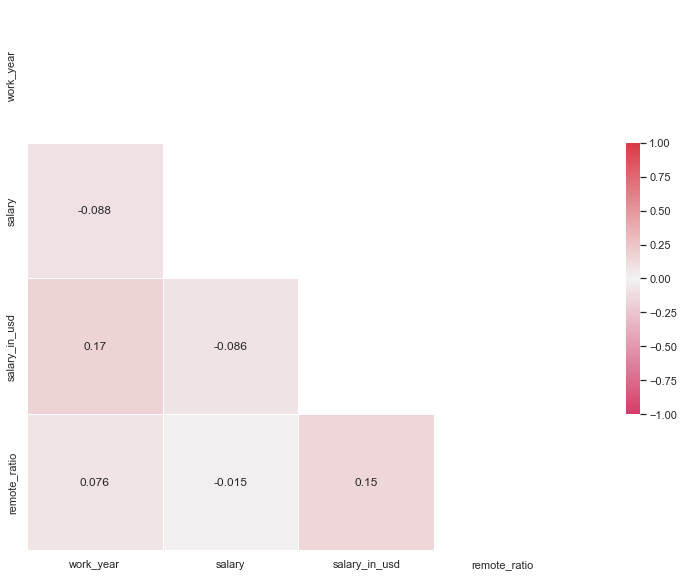

In [13]:
corr_heatmap(df)

In [14]:
stats=salaries.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
work_year,500.0,2021.414,6.837683e-01,2020.0,2021.0,2022.0,2022.0,2022.0,1.0
salary,500.0,334216.446,1.626526e+06,4000.0,70000.0,114000.0,160080.0,30400000.0,90080.0
salary_in_usd,500.0,112996.216,6.961375e+04,2859.0,64594.5,103080.0,150000.0,450000.0,85405.5
remote_ratio,500.0,71.800,4.047266e+01,0.0,50.0,100.0,100.0,100.0,50.0


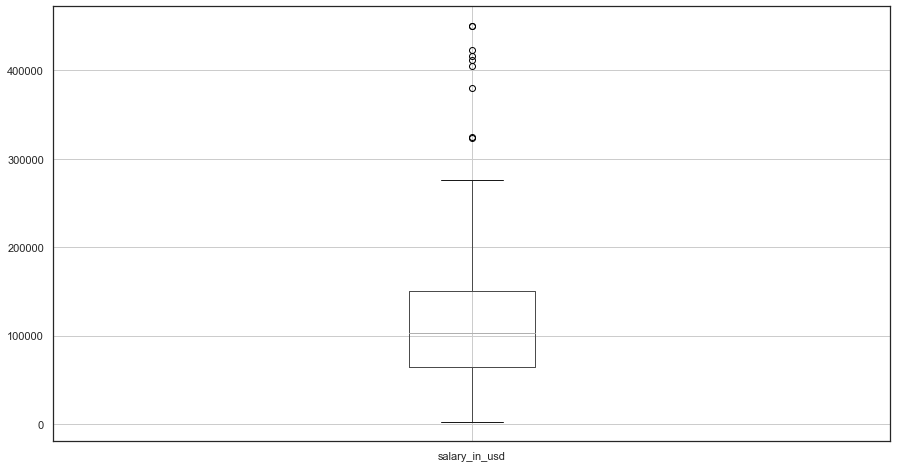

In [15]:
df[['salary_in_usd']].boxplot(figsize=(15, 8));

In [16]:
cols=df[['salary', 'salary_currency']]
df.drop(columns=cols, axis=1, inplace=True)

In [17]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0,RO,0,US,L


In [18]:
#convertimos las columnas categóricas en ordinarias
cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

In [19]:
df_dummy = pd.get_dummies(df, columns=cols, drop_first=True)

In [20]:
df_dummy.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2022,140250.0,100,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0

In [46]:
#separo el dataframe en dos de nuevo, uno el testeo y otro salaries.
df1 = df_dummy.iloc[:499] #salaries
df2 = df_dummy.iloc[500:] #test
df2.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2020,NaN,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
df1.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2022,140250.0,100,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0

In [23]:
#entrenamos 80/20 con salaries
from sklearn.model_selection import train_test_split as tts

X=df1.drop(['salary_in_usd'], axis=1)  # separacion X y

y=df1.salary_in_usd

# Your code here:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((399, 164), (100, 164), (399,), (100,))

### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred_rfc=rfc.predict(X_test)

y_pred_rfc[:10]

array([ 65000., 140000., 241000.,  90320.,  90320.,  49646., 192400.,
       209100., 150000., 100000.])

In [25]:
#Accuracy

from sklearn.metrics import accuracy_score as acc

rfc.score(X_test, y_test), acc(y_test, y_pred_rfc)


(0.05, 0.05)

In [26]:
from sklearn.metrics import mean_squared_error as mse

In [27]:
mse(y_test, y_pred_rfc, squared=False)   # RMSE

54690.039318874144

In [28]:
df2.drop(columns='salary_in_usd', inplace=True)

In [29]:
df2.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2020,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
y_pred_rfc=rfc.predict(df2)

y_pred_rfc[:10]

array([ 41689., 103000., 135000., 115000.,  40481.,   2859., 412000.,
        59102.,   5679., 150000.])

In [31]:
solution = pd.DataFrame(y_pred_rfc)
solution.head()

,0
0,41689.0
1,103000.0
2,135000.0
3,115000.0
4,40481.0


In [32]:
solution.reset_index(drop=False, inplace=True)
solution.head()

,index,0
0,0,41689.0
1,1,103000.0
2,2,135000.0
3,3,115000.0
4,4,40481.0


In [33]:
solution.rename(columns={"index": "id", 0: "salary_in_usd"}, inplace= True)

In [34]:
solution.to_csv('../results/rfr_dummies.csv', index=False)

### Probar con todos los modelos

In [36]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [39]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split as tts

X=df1.drop(['salary_in_usd'], axis=1)  # separacion X y

y=df1.salary_in_usd

# Your code here:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:57<00:00,  6.13s/it]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
RidgeClassifierCV                0.06               0.06    None      0.05   
RidgeClassifier                  0.06               0.06    None      0.05   
GaussianNB                       0.07               0.06    None      0.06   
ExtraTreesClassifier             0.05               0.06    None      0.03   
LGBMClassifier                   0.05               0.06    None      0.03   
RandomForestClassifier           0.05               0.06    None      0.03   
BaggingClassifier                0.05               0.05    None      0.03   
LogisticRegression               0.05               0.05    None      0.04   
DecisionTreeClassifier           0.04               0.05    None      0.02   
LabelPropagation                 0.04               0.05    None      0.02   
LabelSpreading                   0.04               0.05    None

In [54]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred_clf=clf.predict(X_test)

y_pred_clf[:10]

array([ 65000., 210000., 241000.,  90320.,  90320., 115000., 192400.,
       209100., 150000.,  25000.])

In [55]:
#Accuracy

from sklearn.metrics import accuracy_score as acc

clf.score(X_test, y_test), acc(y_test, y_pred_clf)

(0.06, 0.06)

In [56]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred_clf, squared=False)   # RMSE

62369.7728247426

In [57]:
df2.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2020,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
df2.drop(columns='salary_in_usd', inplace=True)

In [51]:
y_pred_clf=rfc.predict(df2)

y_pred_clf[:10]

array([ 41689., 103000., 135000., 115000.,  40481.,   2859., 412000.,
        59102.,   5679., 150000.])

In [52]:
solution_gauss = pd.DataFrame(y_pred_clf)
solution_gauss.head()

,0
0,41689.00
1,103000.00
2,135000.00
3,115000.00
4,40481.00


In [61]:
solution_gauss.reset_index(drop=False, inplace=True)
solution_gauss.head()

,index,0
0,0,41689.00
1,1,103000.00
2,2,135000.00
3,3,115000.00
4,4,40481.00


In [62]:
solution_gauss.rename(columns={"index": "id", 0: "salary_in_usd"}, inplace= True)

In [64]:
solution_gauss.head()

,id,salary_in_usd
0,0,41689.00
1,1,103000.00
2,2,135000.00
3,3,115000.00
4,4,40481.00


In [65]:
solution_gauss.to_csv('../results/gaussianNB_dummies.csv', index=False)